# Predictions based on second vector

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Parameters:
* Season
* Stage
* Date
* WIN DRAW LOOSE

BOTH TEAMS:
* Age
* TMV (Total Market Value)


In [3]:
match2 = pd.read_csv('learning_vectors/v03/version03-transfermarkt.csv', sep=',')
match2 = match2.set_index(['Match_id'])

match2 = match2.sort_values(['League_id', 'Date'])
match2.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                  'H_age', 'A_age',
                  'H_TMV', 'A_TMV']
match2.head()


,League_id,Season,Stage,Date,H_team,A_team,Result,H_age,A_age,H_TMV,A_TMV
Match_id,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,21.3,24.6,250.0,64.0
1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,24.9,23.9,91.0,257.0
1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,24.3,25.7,80.0,61.0
1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,24.4,26.4,162.0,86.0
1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,22.3,22.5,73.0,212.0


In [7]:
#Check for nulls
print(match2.isnull().sum())
match2.isnull().any().any()


League_id    0
Season       0
Stage        0
Date         0
H_team       0
A_team       0
Result       0
H_age        0
A_age        0
H_TMV        0
A_TMV        0
dtype: int64


False

## Different algorithms comparison

Alg/res.mean/res.std
LR: 0.535033 (0.018720)
LDA: 0.534868 (0.008138)
KNN: 0.475164 (0.005647)
CART: 0.413651 (0.007914)
NB: 0.526645 (0.011362)
SVM: 0.458388 (0.013590)


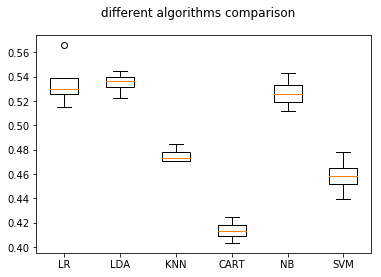

In [9]:
predictors = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
